In [122]:
# Make module from local packages importable
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

#### We assume that the robustness measures are stored in a dictionary D. Feature names are the keys of D and map to a dictionary mapping robustness names to their computed values.

In [123]:
import json
#json_path = "../data/20180531-143635/robustness_measures/computations.json"
json_path = "../data/20180531-151046/robustness_measures/computations.json"
#family = "pyrad"
family = "ipca"
if not os.path.isdir(family):
    os.mkdir(family)
with open(json_path) as f:
    feature_dic = json.load(f)

In [124]:
print("Number of features {}".format(len(feature_dic)))

Number of features 100


In [125]:
feature_names = list(feature_dic.keys())
feature_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

In [126]:
some_feature = feature_names[0]
print("Number of samples {}".format(feature_dic[some_feature]["n_samples"]))

Number of samples 12478


In [127]:
robustness_names = list(feature_dic[some_feature].keys())
robustness_names.remove('n_samples')
robustness_names

['ICC_C1', 'ICC_A1', 'pearsonr', 'linccc']

## Sort by robustness value

In [128]:
def sort_by_value(f_dic, robustness_name):
    # Collect values
    pairs = []
    for f_name in f_dic:
        pairs.append((f_name, f_dic[f_name][robustness_name]))

    # Sort by second value (robustness)
    pairs = sorted(pairs, key=lambda x: -x[1])
    return pairs

In [129]:
import re
def to_camelcase(s):
    return re.sub(r'(?!^)_([a-zA-Z0-9])', lambda m: m.group(1).upper(), s)

for r_name in robustness_names:
    s = sort_by_value(feature_dic, r_name)
    print("--- {} ---".format(r_name))
    with open("{}/{}_{}_top_features.csv".format(family, family, r_name), "w") as f:
        print("FeatureName,FeatureValue")
        f.write("FeatureName,FeatureValue\n")
        for t in s[:15]:
            f.write("{},{}".format(to_camelcase(t[0]), t[1]))
            f.write("\n")
            print("{},{}".format(to_camelcase(t[0]), t[1]))

--- ICC_C1 ---
FeatureName,FeatureValue
73,0.9687313258290149
71,0.9618777817703826
90,0.9601423185400434
48,0.9599406772706258
84,0.9591355579737919
52,0.9579006231196275
44,0.952831074939461
83,0.9524962720459131
64,0.952375602259963
66,0.9520676008837827
72,0.9517134323543146
74,0.9511602476090002
69,0.9501835479797086
58,0.9495876862686141
59,0.9494837186907025
--- ICC_A1 ---
FeatureName,FeatureValue
73,0.9687336000331506
71,0.9618806393623883
90,0.9601452409259073
48,0.9599425616933482
84,0.959136448759755
52,0.9579038524473756
44,0.9528346768021028
83,0.9524949493290227
64,0.9523779138232628
66,0.9520702292992519
72,0.9517154129667708
74,0.9511526501598819
69,0.9501873083131319
58,0.9495894973235269
59,0.949483985725071
--- pearsonr ---
FeatureName,FeatureValue
73,0.9687335244417095
71,0.9618796275000737
90,0.960142323219721
48,0.9599593992179989
84,0.9591429228861409
52,0.9579220777657985
44,0.9528310793861365
83,0.9525203216815137
64,0.9523871733979622
66,0.9520703103441036
72,

## Robustness Histogram

In [130]:
import matplotlib.pyplot as plt
import math

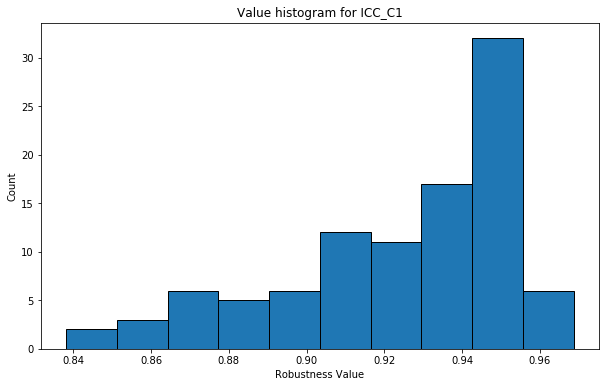

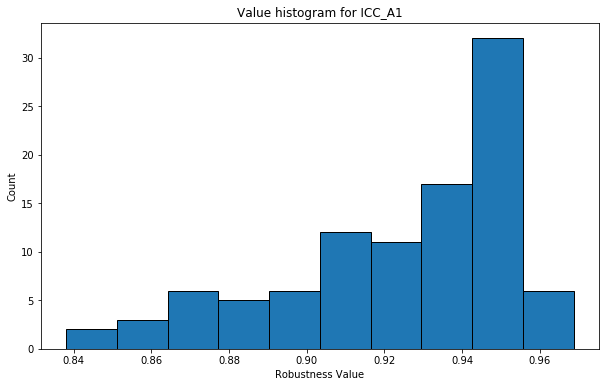

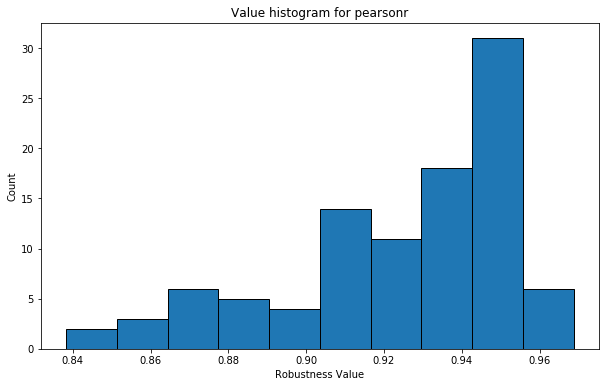

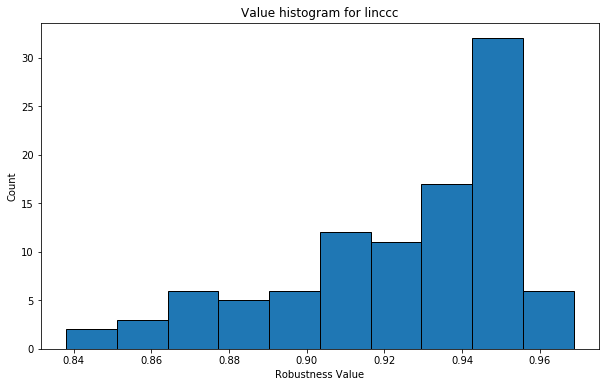

In [131]:
for r_name in robustness_names:
    # collect values
    values = []
    for f_name in feature_dic:
        v = feature_dic[f_name][r_name]
        if not math.isnan(v):
            values.append(v)
        
    plt.figure(figsize=(10, 6))
    plt.title("Value histogram for {}".format(r_name))
    plt.xlabel("Robustness Value")
    plt.ylabel("Count")
    plt.hist(values, edgecolor='black')
    plt.savefig("{}/{}_{}_histo.pdf".format(family, family, r_name))

In [132]:
feature_dic["5"]

{'n_samples': 12478,
 'ICC_C1': 0.9033494911778347,
 'ICC_A1': 0.9033286580484573,
 'pearsonr': 0.903777753214569,
 'linccc': 0.9033216591451149}